<a href="https://colab.research.google.com/github/paucaroscanoa/ApiBookAuthor/blob/master/Caso_de_estudio_4_1_Sistema_de_recomendaci%C3%B3n_Principiante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de Estudio 4.1 Sistema de recomendación

## Configuración

Ejecute (Run) estas celdas para instalar los paquetes necesarios para completar el caso de estudio. Esto podría llevar unos minutos así que sea paciente.

In [1]:
!pip install --upgrade pip
!pip install surprise==0.1
print('Librerías instaladas con éxito!')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357285 sha256=ecddb24108a3d1843b7085b5a0d1e959561328ac2e0b0e8f32ca420d150b71cb
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise
Librerías instaladas con éxito!


Si no ha obtenido ningún texto en rojo indicando error entonces la instalación ha terminado con éxito. El texto en amarillo son avisos, no errores.

<h1>Atención:</h1>

Ahora ha de reiniciar el entorno de ejecución. Para ello vaya a:

> Entorno de ejecución > _Reiniciar entorno de ejecución_

en la parte superior de su pantalla. Esto asegurará que sus cambio se han realizado con éxito.

## Importar

from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate




Importe las librerías necesarias para el desarrollo del caso.

In [1]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
print('Librerías faltantes importadas !')

Librerías faltantes importadas !


In [2]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold
%matplotlib inline
print('Librerías importadas con éxito!')

Librerías importadas con éxito!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Datos

In [5]:
data = Dataset.load_builtin('ml-100k')
print('\n\nData load successful!')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


Data load successful!


[Base de datos](https://files.grouplens.org/datasets/movielens/ml-100k.zip)

Carga de histograma con las valoraciones de 1 a 5 según cantidad de usuarios que puntuaron las peliculas



Histograma generado con éxito!


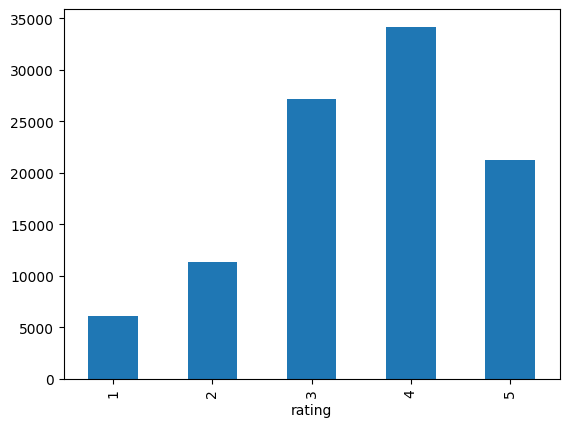

In [6]:
# 1. Obtener el archivo de valoraciones (ratings) del objeto "data"
ratings_file = data.ratings_file

# 2. Cargue la tabla usando pandas, una herramienta común de tratamiento de datos
# Se establecen los nombres de las columnas de forma manual en este caso
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

# 3. Obtener la columna de valoraciones (ratings)
ratings = raw_data.rating

# 4. Generar un gráfico de barras/histograma con dichos datos
ratings.value_counts().sort_index().plot.bar()

print('\n\nHistograma generado con éxito!')

In [7]:
# Vamos a generar los porcentages de cada uno de los valores de los ratings
print(ratings.value_counts().sort_index())

rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64


In [8]:
print(ratings.value_counts(normalize=True)*100)

rating
4    34.174
3    27.145
5    21.201
2    11.370
1     6.110
Name: proportion, dtype: float64




La cantidad de valores de los 5 mayores y menores valores son
item_id
50      583
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: count, Length: 1682, dtype: int64


Histograma Item_id v/s Cantidad!


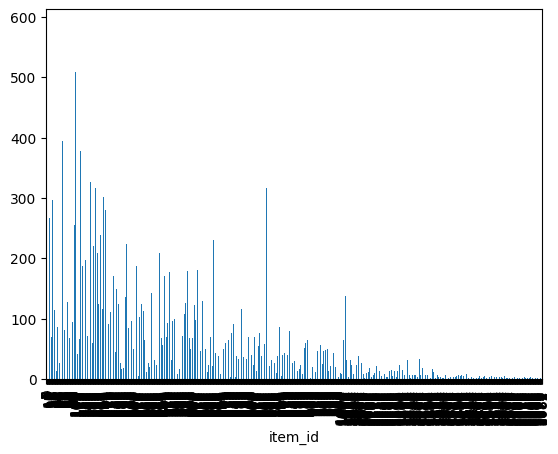

In [9]:
# Obtener la columna de valoraciones del item_id
item = raw_data.item_id

# Imprimier la cantidad de valores por columna item_id
print('\n\nLa cantidad de valores de los 5 mayores y menores valores son')
print(item.value_counts())

# Generar un gráfico de barras/histograma de Item_id
item.value_counts().sort_index().plot.bar()

print('\n\nHistograma Item_id v/s Cantidad!')



La cantidad de valores de los 5 mayores y menores valores son
user_id
405    737
655    685
13     636
450    540
276    518
      ... 
441     20
36      20
812     20
895     20
93      20
Name: count, Length: 943, dtype: int64


Histograma user_id v/s Cantidad!


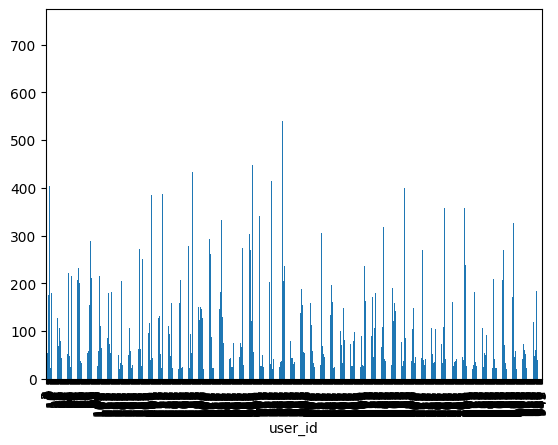

In [10]:
# Obtener la columna de valoraciones del user_id
user = raw_data.user_id

# Imprimier la cantidad de valores por columna user_id
print('\n\nLa cantidad de valores de los 5 mayores y menores valores son')
print(user.value_counts())

# Generar un gráfico de barras/histograma de user_id
user.value_counts().sort_index().plot.bar()

print('\n\nHistograma user_id v/s Cantidad!')

In [11]:
print(raw_data)

       user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]


In [12]:
len(ratings)

100000

In [13]:
raw_data.nunique()

,0
user_id,943
item_id,1682
rating,5
timestamp,49282


In [14]:
print(raw_data.describe)

<bound method NDFrame.describe of        user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]>


In [15]:
print(raw_data.rating.isnull)

<bound method Series.isnull of 0        3
1        3
2        1
3        2
4        1
        ..
99995    3
99996    5
99997    1
99998    2
99999    3
Name: rating, Length: 100000, dtype: int64>


**<h1>PREGUNTA 1: ANÁLISIS DE DATOS</h1>**

# Describe la forma de los datos, ¿como estan distribuidos? ¿Cuantas valoraciones hay disponibles?



*Su respuesta aqui - double click para editar*

## Modelo 1: aleatorio

In [16]:
# Crear el objeto para el modelo
model_random = NormalPredictor()
print('\n\nModelo aleatorio creado con éxito!')



Modelo aleatorio creado con éxito!


In [17]:
# Entrenar con los datos usando validación cruzada con k=5
# iteraciones, midiendo el RECM
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nEntrenamiento del modelo finalizado con éxito!')

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5157  1.5126  1.5220  1.5208  1.5167  1.5176  0.0034  
Fit time          0.14    0.32    0.54    0.28    0.14    0.28    0.15    
Test time         0.11    0.17    0.30    0.68    0.09    0.27    0.22    


Entrenamiento del modelo finalizado con éxito!


## Modelo 2: filtrado colaborativo basado en usuarios

### Creación Modelo KNNBasic

In [18]:
# Crear el objeto para el modelo
model_user = KNNBasic(sim_options={'user_based': True})
print('\n\nModelo creado con éxito!')



Modelo creado con éxito!


In [19]:
# Entrenar con los datos usando validación cruzada con k=5
# iteraciones, midiendo el RECM
# Atención, esto podría generar un output con muchas líneas impresas
# Puede usar "verbose = False" para prevenir esto
model_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nEntrenamiento del modelo finalizado con éxito!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9744  0.9840  0.9795  0.9731  0.9802  0.9782  0.0040  
Fit time          0.39    0.62    0.42    0.63    0.53    0.52    0.10    
Test time         3.53    4.30    3.88    3.43    4.38    3.90    0.39    


Entrenamiento del modelo finalizado con éxito!


## Modelo 3: filtrado colaborativo basado en ítems

###Creación Modelo KNNBasic

In [20]:
# Crear el objeto para el modelo
model_item = KNNBasic(sim_options={'user_based': False})
print('\n\nModelo creado con éxito!')



Modelo creado con éxito!


In [21]:
# Entrenar con los datos usando validación cruzada con k=5
# iteraciones, midiendo el RECM
# Atención, esto podría generar un output con muchas líneas impresas
# Puede usar "verbose = False" para prevenir esto
model_item_results = cross_validate(model_item, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nEntrenamiento del modelo finalizado con éxito!')


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9767  0.9813  0.9692  0.9702  0.9719  0.9739  0.0045  
Fit time          0.66    0.84    0.61    0.65    0.87    0.73    0.11    
Test time         3.85    5.14    3.86    4.67    4.06    4.32    0.51    


Entrenamiento del modelo finalizado con éxito!


**<h1>PREGUNTA 2: MODELOS DE FILTRADO COLABORATIVO</h1>**



# Compare los resultados de los modelos de filtrado colaborativo basados en usuarios y en itens. ¿Qué diferencias encuentra entre los dos? ¿Qué diferencias encuentra entre estos modelos y el modelo aleatorio? ¿Puede explicar qué podría haber causado estas diferencias en los resultados?

*Su respuesta aqui - double click para editar*

## Modelo 4: factorización de matriz

In [22]:
# Crear el objeto para el modelo
model_matrix = SVD()
print('\n\nModelo creado con éxito!')



Modelo creado con éxito!


In [23]:
# Entrenar con los datos usando validación cruzada con k=5
# iteraciones, midiendo el RECM
# Atención, esto podría llevar cierto tiempo (2-3 minutos), sea paciente
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nEntrenamiento del modelo finalizado con éxito!')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9295  0.9459  0.9403  0.9356  0.9326  0.9368  0.0058  
Fit time          1.57    1.73    1.86    2.51    2.05    1.94    0.32    
Test time         0.13    0.15    0.38    0.21    0.32    0.24    0.10    


Entrenamiento del modelo finalizado con éxito!


**<h1>PREGUNTA 3: MODELO DE FACTORIZACIÓN DE MATRIZ</h1>**

#El modelo de factorización de matriz es diferente de los modelos de filtrado colaborativo. Describa brevemente en qué consisten dichas diferencias. También, compare de nuevo el RECM respecto al resto de modelos. ¿Mejora? ¿Puede ofrecer alguna explicación de por qué mejora/empeora?



*Su respuesta aqui - double click para editar*



## Precisión and exhaustividad @`k` (*precision and recall @k*)

Queremos calcular la precisión y la exhaustividad para 2 valores de `k`: 5 y 10. Hemos incluído unas cuantas líneas de código que le ayudarán a conseguirlo.

Primero, definimos una función que toma algunas predicciones, un valor de `k` y un parámetro de umbral. Este código ha sido adaptado de la siguiente [fuente](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k).

**Asegúrese de que ejecuta esta celda**

In [24]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Devuelve la precision y la exhaustividad @k para cada usuario'''

    # Primero asocie las predicciones a cada usuario
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Ordene las valoraciones de los usuarios por su valor estimado
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Número de ítems relevantes
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Número de ítems recomendados en el top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Número de ítems relevantes y recomendados en el top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@k: proporción de ítems recomendados que son relevantes
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Exhaustividad@K: proporción de ítems relevantes que se recomiendan
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

print('\n\nFunción creada con éxito!')



Función creada con éxito!


A continuación, calculamos la precisión y exhaustividad @`k` = 5 y 10. Usamos validación cruzada con 5 iteraciones de nuevo para promediar los resultados a lo largo de toda la base de datos.

Sea paciente porque esto podría llevar cierto tiempo en ejecutarse.

In [25]:
# Cree una lista de los valores de k
K = [5, 10]

# Cree una lista de modelos

models = [model_random, model_user, model_item, model_matrix]
model_names = ['modelo aleatorio', 'filtrado colaborativo usuario',
               'filtrado colaborativo ítem','factorización de matriz']

# Cree un objeto de validación cruzada con k-iteraciones (diferente "k")
k_fold = KFold(n_splits=5)

for k in K:
    for i, model in enumerate(models):
        print(f'>>> k={k}, modelo={model_names[i]}')
        precision = []
        exhaustividad = []
        for trainset, testset in k_fold.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # La precisión y la exhaustividad pueden promediarse sobre todos los usuarios
            precision.append(sum(prec for prec in precisions.values()) / len(precisions))
            exhaustividad.append(sum(rec for rec in recalls.values()) / len(recalls))

        print('>>> precisión:', round(sum(precision) / len(precision), 4))
        print('>>> exhaustividad  :', round(sum(exhaustividad) / len(exhaustividad), 4))
        print('\n')

print('\n\nCálculo de la precisión y la exhaustividad finalizado con éxito!')

>>> k=5, modelo=modelo aleatorio
>>> precisión: 0.5865
>>> exhaustividad  : 0.3416


>>> k=5, modelo=filtrado colaborativo usuario
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precisión: 0.7651
>>> exhaustividad  : 0.4593


>>> k=5, modelo=filtrado colaborativo ítem
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precisión: 0.8232
>>> exhaustividad  : 0

**<h1>PREGUNTA 4: PRECISIÓN/EXHAUSTIVIDAD</h1>**

# Calcule la precisión y la exhaustividad, para cada uno de los 4 modelos, con `k` = 5 y 10. Es decir, 2 x 2 x 4 = 16 valores numéricos. ¿Nota algo diferente en estos valores? ¿Algo diferente de los valores de RECM calculados anteriormente?




*Su respuesta aqui - double click para editar*

##  Top-`n` Predicciones

Finalmente, queremos ver cómo son las recomendaciones y las estimaciones de valoraciones de los usuarios.

In [26]:
def get_top_n(predictions, n=5):
    '''Devuelve las top-N recomendaciones para cada usuario de un conjunto de predicciones.

    Argumentos:
        predictions(lista de objetos de predicción): lista de la predicciones,
            tal y como se obtienen del método "test" de un algoritmo
        n(int): número de recomendaciones a mostrar para cada usuario.
            Por defecto es 10.

    Salidas:
    Un diccionario donde las keys son las IDs de los usuarios y los valores son
    una lista de tuples:
        [(item id, estimación de la valoración), ...] de tamaño n.
    '''

    # Primero asocie las predicciones a cada usuario.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # A continuación ordene las predicciones para cada usuario y obtenga las
    # n predicciones más elevadas
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

print('Función creada con éxito!')

Función creada con éxito!


Por último, ejecutamos esta función en cada uno de los modelos, primero entrenando en **la totalidad** de los datos disponibles, y después prediciendo los datos que faltan. Usamos `n` = 5, pero puede elegir cualquier valor razonable de n.

Esto podría llevar cierto tiempo de computación, así que sea paciente.


In [27]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()
print('\n\nConjuntos de prueba y entrenamiento creados con éxito!')



Conjuntos de prueba y entrenamiento creados con éxito!


In [28]:
for modelo in models:
    modelo.fit(trainset)
    predictions = modelo.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Muestre el primer usuario de la base de datos
    user = list(top_n.keys())[0]
    print(f'modelo: {modelo}, {user}: {top_n[user]}')

print('\n\nCálculo de las top-N predicciones realizado con éxito!')

modelo: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7cf4072dd540>, 196: [('346', 5), ('451', 5), ('29', 5), ('768', 5), ('4', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
modelo: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7cf4065bda50>, 196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
modelo: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7cf40609ca30>, 196: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075)]
modelo: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7cf4060f7310>, 196: [('64', 4.6973621257983), ('318', 4.608967169700561), ('357', 4.608271204886374), ('483', 4.550352026451898), ('480', 4.547561707927986)]


Cálculo de las top-N predicciones realizado con éxito!


**<h1>PREGUNTA 5: TOP-N PREDICCIONES</h1>**

# ¿Tienen sentido las top-n predicciones que ha obtenido? ¿Cuál es el valor de las valoraciones (1-5) de estas predicciones? ¿Cómo podría usar estas predicciones en la vida real si estuviera intentando construir un sistema de recomendación genérico para una compañía?





*Su respuesta aqui - double click para editar*

¡Buen trabajo! Asegúrese de que comprueba la sección **Entrega** del manual de instrucciones para terminar y entregar este caso correctamente.

# -----------------------------------------------------------------------------------------
# ************* Analisis Adicional: K óptimo segun el RMSE *************

In [29]:
# Evaluar RMSE para los siguientes valores de K
# se busca determinar el K óptimo de manera gráfica.
# --------------------------------------------------
k_value = [5,10,20,50,100]
error = list()
for i  in k_value:
  model_user_results = cross_validate(model_user, data, measures=['RMSE'],cv=i, verbose=False)
  error_medio=(model_user_results['test_rmse'].sum())/i
  error.append(error_medio)
  print(error_medio)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9774943629101933
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity mat

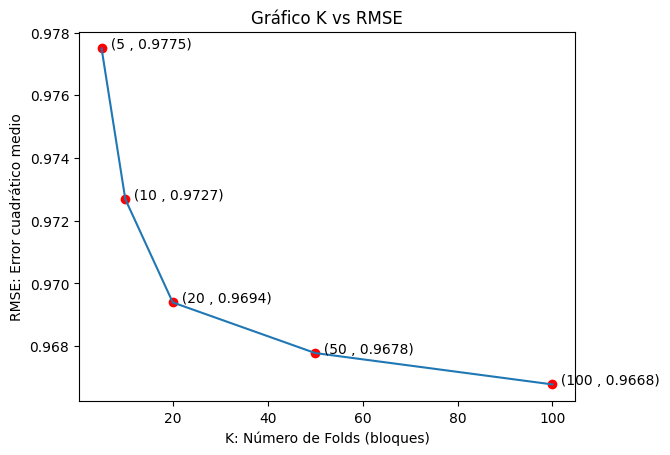

In [30]:
dicc ={'k_value(K)':k_value, 'error(RMSE)':error}
df=pd.DataFrame(dicc)


import matplotlib.pyplot as plt
import math
plt.plot(k_value,error)
plt.scatter(k_value, error,marker='o', color='r')
annotations=[]
for i in range(0,len(error)):
  annotations.append('  ('+ str(k_value[i]) + ' , ' + str(round(error[i],4)) +')')
for i, label in enumerate(annotations):
    plt.text(k_value[i], error[i],label)
plt.xlabel('K: Número de Folds (bloques)')
plt.ylabel('RMSE: Error cuadrático medio')
plt.title('Gráfico K vs RMSE')
plt.show()